### Aim:
Trying to categorize a song into one of the given genres hence it will be helpful for mapping them with the emotion predicted easily.

#### Data Specifications:
* <b>Genre Original:</b> A collection of 10 genres with 100 audio files each from the GTZAN dataset.
* <b>Images Original:</b> Visual Representation of each Audio Files, helpful for CNN's implementation.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

#New Libraries for Audio Files
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [3]:
!ls

arranging_data.py	      features_3_sec.csv	  images_original
data_augmentation_KDEF.ipynb  genre_prediction.ipynb	  reading_data.py
Emotion_Detection_Models      genres_original
features_30_sec.csv	      haar_cascade_classifier.py


In [4]:
genre_dir = 'genres_original'

In [5]:
for i,j,k in os.walk(genre_dir):
    genres = j
    break

In [6]:
genres

['country',
 'rock',
 'hiphop',
 'jazz',
 'metal',
 'blues',
 'classical',
 'pop',
 'disco',
 'reggae']

#### Understanding Audio
* <b>Sound:</b> Sequence of vibrations whose amplitude is represented varying along y-axis with time in x-axis.
* The <b>sample</b> rate is the number of samples of audio carried per second, i.e, it denotes frequency.

In [7]:
y, sr = librosa.load(genre_dir+'/country/country.00000.wav')

print("y: ",y,'\n')
print("Shape of y: ",np.shape(y))
print("Sample Rate (sr): ",sr)

print("Duration (in sec): ",np.shape(y)[0]/sr)

y:  [-0.13415527 -0.19485474 -0.04257202 ...  0.2260437   0.15042114
  0.04238892] 

Shape of y:  (663300,)
Sample Rate (sr):  22050
Duration (in sec):  30.081632653061224


In [8]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [-0.13415527 -0.19485474 -0.04257202 ...  0.2260437   0.15042114
  0.04238892] 

Audio File shape: (663300,)


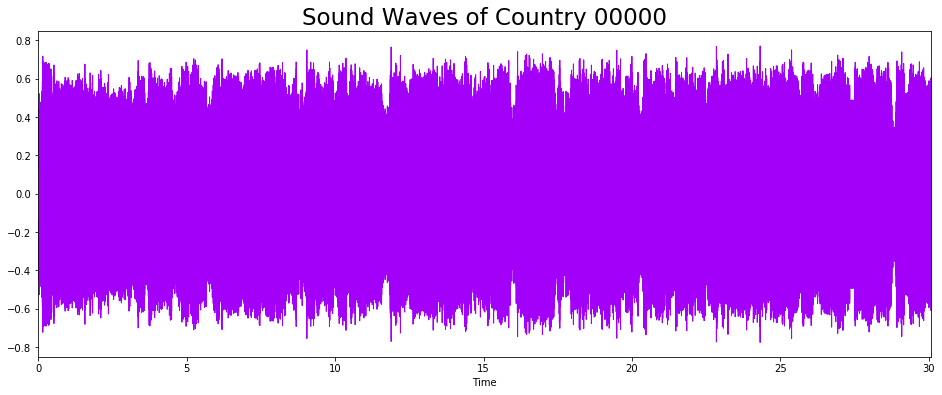

In [9]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves of Country 00000", fontsize = 23);

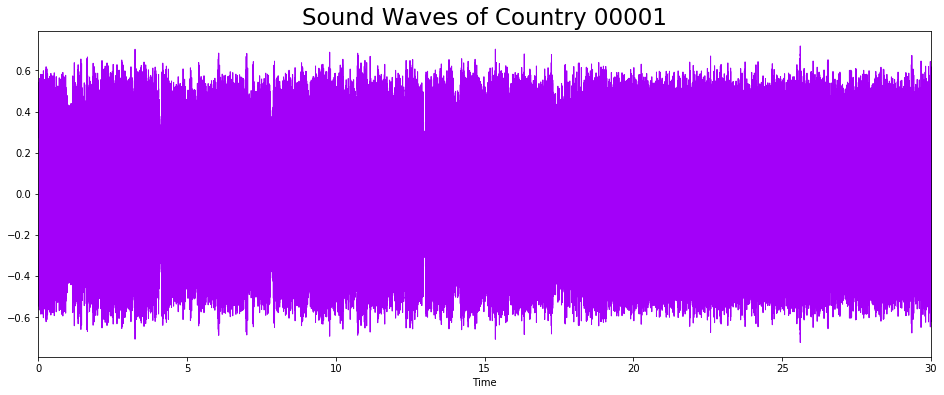

In [10]:
y, sr = librosa.load(genre_dir+'/country/country.00001.wav')

# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves of Country 00001", fontsize = 23);

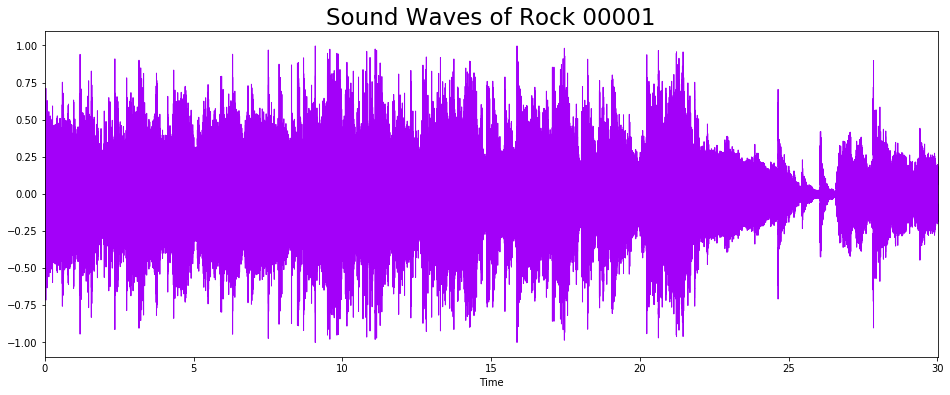

In [11]:
y, sr = librosa.load(genre_dir+'/rock/rock.00001.wav')

# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves of Rock 00001", fontsize = 23);

#### Details of features:
* MFCC1 to MFCC20- 40 columns containing mean and variance value. To know more about MFCC refer [this](https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd).
* length 1 column
* chroma_stft: mean and variance 2 columns
* rms: mean and variance 2 columns
* spectral_centroid and spectral_bandwidth: mean and variance 4 columns
* rolloff: is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies. mean and variance 2 columns
* zero crossing rate: the rate at which the signal changes from positive to negative or back. mean and variance 2 columns
* harmony: mean and variance 2 column
* perceptr: Perceptrual understanding shock wave represent sound rythm and emotion. mean and variance 2 column
* tempo: 1 column (Beats per Minute)

#### Fourier Transform
* Converting Signal in Time Domain to Frequency Domain
* X-axis, i.e, Time is converted to frequency and Y-axis, i.e, Amplitude is converted to Decibels.

In [12]:
# Default window size for FFT
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns

#Short-time Fourier Transform
stf = np.abs(librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length))

(1025, 1293)


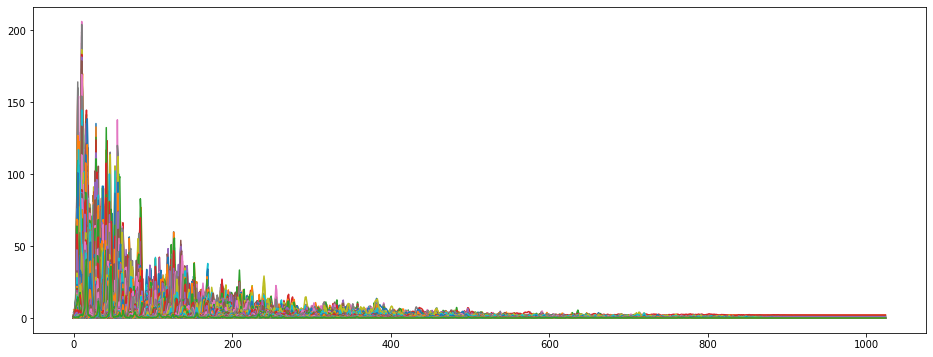

In [13]:
print(stf.shape)
plt.figure(figsize=(16, 6))
plt.plot(stf);

#### The Spectrogram
* Visual representation of the spectrum of the frequencies of a signal as it varies with time.
* Here we convert the frequency axis to logarithms.

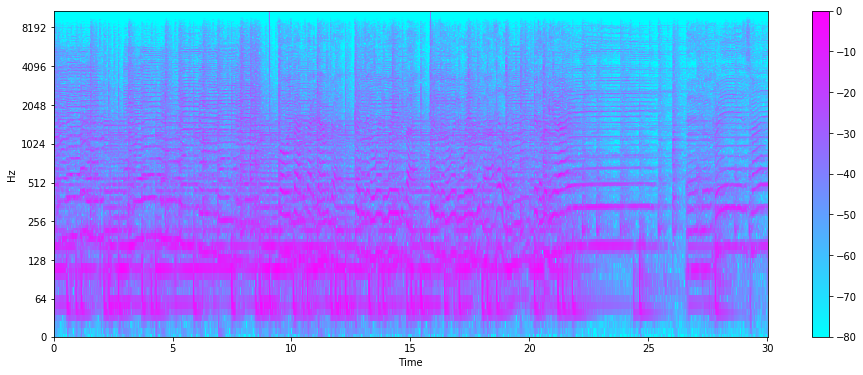

In [14]:
db_stft = librosa.amplitude_to_db(stf, ref=np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(db_stft, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.colorbar();

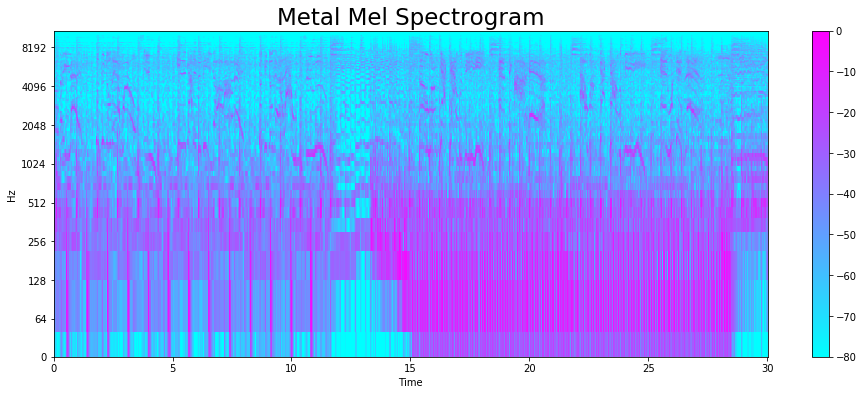

In [15]:
y, sr = librosa.load(f'{genre_dir}/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

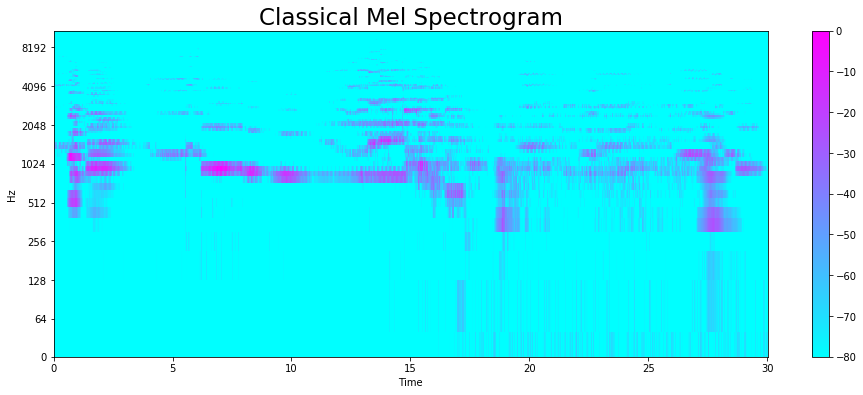

In [16]:
y, sr = librosa.load(f'{genre_dir}/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

In [17]:
data = pd.read_csv('features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [18]:
# Preprocessing
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns!='label']
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns = cols)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
def model_train(model, title):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print('Accuracy', title, ':', round(accuracy_score(y_test, y_pred), 5), '\n')

In [21]:
#Naive Bias
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_train(nb, "Naive Bayes")

[[21  0  1  1  0  0  9  0  2  1]
 [ 2 18  0  0  0  0  0  0  0  0]
 [18  0  8  2  1  1  3  0  0  4]
 [ 0  0  0 17  4  0  7  0  4  2]
 [ 4  0  0  1 13  0  2  1  2  1]
 [13  4  1  3  1  9  1  0  1  0]
 [ 0  0  0  3  0  0 27  0  0  0]
 [ 0  0  0  2  0  2  0 17  1  1]
 [ 7  0  3  0  2  1  2  1 10  3]
 [10  0  0  3  1  0 12  0  2  7]]
Accuracy Naive Bayes : 0.49 



In [22]:
knn = KNeighborsClassifier(n_neighbors=15)
model_train(knn, "KNN")

[[15  0 13  0  0  0  2  0  0  5]
 [ 0 19  0  0  0  1  0  0  0  0]
 [ 0  3 27  2  0  0  0  1  2  2]
 [ 1  0  3 18  2  0  3  2  2  3]
 [ 0  0  0  2 14  0  1  4  3  0]
 [ 1  8  3  2  0 16  1  0  1  1]
 [ 0  0  0  1  0  0 28  0  0  1]
 [ 0  0  1  0  0  0  0 20  1  1]
 [ 0  0  3  3  5  0  1  2 13  2]
 [ 1  1  7  9  0  1  5  1  4  6]]
Accuracy KNN : 0.58667 



In [23]:
tree = DecisionTreeClassifier()
model_train(tree, "Decission trees")

[[17  0  2  1  3  4  0  0  0  8]
 [ 0 16  0  0  0  2  0  0  1  1]
 [ 6  1 17  2  1  4  0  0  2  4]
 [ 0  0  3 24  2  0  2  1  1  1]
 [ 0  1  0  1 14  0  1  0  3  4]
 [ 1  5  4  1  0 17  1  1  2  1]
 [ 1  0  0  2  3  0 21  1  0  2]
 [ 0  0  0  0  3  0  0 16  3  1]
 [ 2  2  0  0  0  0  1  0 21  3]
 [ 8  1  3  3  2  4  2  0  2 10]]
Accuracy Decission trees : 0.57667 



In [24]:
# Logistic Regression
log_reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_train(log_reg, "Logistic Regression")

[[16  0  3  0  0  1  7  0  2  6]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 6  0 19  2  0  1  1  4  1  3]
 [ 0  0  1 15  5  0  3  5  2  3]
 [ 0  0  0  1 17  0  3  0  3  0]
 [ 2  3  0  1  0 26  0  0  1  0]
 [ 2  0  0  1  0  0 27  0  0  0]
 [ 0  0  1  1  0  0  0 19  2  0]
 [ 3  0  3  1  4  0  2  0 15  1]
 [ 6  0  0  1  1  2  8  1  4 12]]
Accuracy Logistic Regression : 0.62 



In [25]:
# Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_train(rf, "Random Forest")

[[23  0  4  0  0  1  1  0  0  6]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 3  0 26  1  0  1  1  0  1  4]
 [ 0  0  1 21  7  0  3  0  0  2]
 [ 0  0  0  0 18  0  1  0  4  1]
 [ 0  3  1  0  1 28  0  0  0  0]
 [ 0  0  0  1  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 19  4  0]
 [ 1  0  2  0  3  0  1  2 20  0]
 [ 0  0  4  2  1  1  7  1  2 17]]
Accuracy Random Forest : 0.73667 



In [26]:
# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_train(xgb, "Cross Gradient Booster")

[[25  0  2  0  1  2  1  0  0  4]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 4  0 26  0  0  0  0  1  0  6]
 [ 0  0  0 25  5  0  2  0  1  1]
 [ 0  0  0  0 22  0  1  0  1  0]
 [ 1  2  0  0  0 29  0  0  1  0]
 [ 1  0  0  1  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 21  2  0]
 [ 1  0  1  1  1  0  1  4 16  4]
 [ 1  0  4  1  1  0  2  1  2 23]]
Accuracy Cross Gradient Booster : 0.78333 



In [27]:
# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_train(xgbrf, "Cross Gradient Booster (Random Forest)")

[[15  0  4  2  3  2  0  0  1  8]
 [ 0 19  0  0  0  1  0  0  0  0]
 [ 2  0 19  0  1  4  0  1  5  5]
 [ 0  0  1 16  9  2  3  1  1  1]
 [ 0  0  2  1 17  0  1  0  3  0]
 [ 2  6  0  0  0 24  0  0  1  0]
 [ 0  0  1  1  2  1 25  0  0  0]
 [ 0  0  1  0  0  1  0 19  1  1]
 [ 0  0  4  4  5  2  0  3 10  1]
 [ 1  0  8  4  2  2  7  1  2  8]]
Accuracy Cross Gradient Booster (Random Forest) : 0.57333 



In [28]:
# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_train(svm, "Support Vector Machine")

[[16  0  5  0  0  1  7  0  0  6]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 3  0 21  4  0  1  1  1  1  5]
 [ 0  0  0 20  4  0  3  2  2  3]
 [ 0  0  0  1 17  0  1  1  4  0]
 [ 2  2  0  1  0 27  0  0  1  0]
 [ 0  0  0  1  0  0 28  0  0  1]
 [ 0  0  2  1  0  0  0 18  1  1]
 [ 2  0  3  2  3  0  2  0 15  2]
 [ 3  0  2  6  1  1  8  1  2 11]]
Accuracy Support Vector Machine : 0.64333 



Accuracy : 0.999 



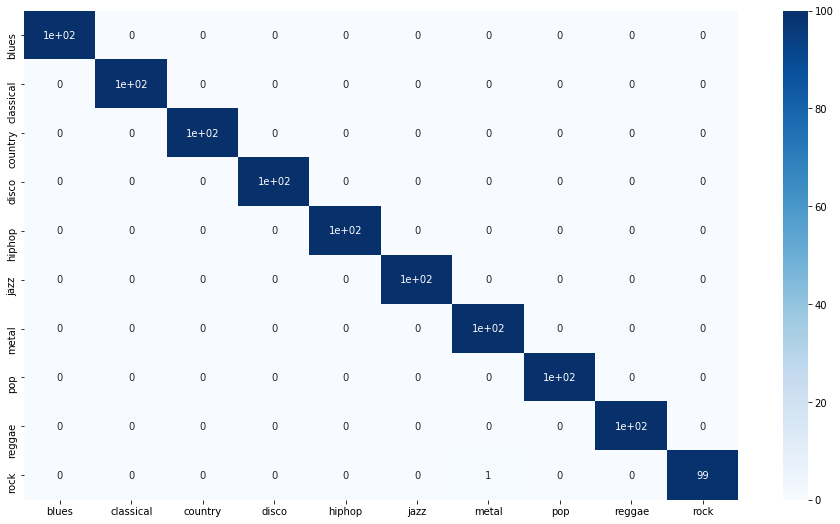

In [38]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X, y)


preds = xgb.predict(X)

print('Accuracy', ':', round(accuracy_score(y, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")